### Pandas: *data cleansing and aggregation*  

#### Baixa't el datatset *Titanic-Survival* del drive.

Aquest dataset conté els següents fitexrs:

- *passatgers.csv*: dades personals dels passatgers del Titanic

|   **Camp**  | **Definició**                                                                 |   |   |
|:-----------:|-------------------------------------------------------------------------------|---|---|
| id          | Identificador del passatger                                                   |   |   |
| name        | Nom del passatger                                                             |   |   |
| gender      | Gènere (masculí/femení)                                                       |   |   |
| age         | Edat                                                                          |   |   |

- *Southhampton.csv*: dades d'embarcament de passatgers al port de Southampton
- *Queenstown.csv*: dades d'embarcament de passatgers al port de Queenstown
- *Cherbourg.csv*: dades d'embarcament de passatgers al port de Cherbourg

|   **Camp**  | **Definició**                                                                 |   |   |
|:-----------:|-------------------------------------------------------------------------------|---|---|
| pssg_id     | Identificador del passatger                                                   |   |   |
| ticket      | Número de bitllet                                                             |   |   |
| fare        | Tarifa de passatger                                                           |   |   |
| class       | Indicador d'estatus socioeconòmic                                             |   |   |
| cabin       | Número de cabina                                                              |   |   |

- *survivors.csv*: identificadors dels passatgers que van sobreviure (els que no van sobreviure no hi són)

|   **Camp**  | **Definició**                                                                 |   |   |
|:-----------:|-------------------------------------------------------------------------------|---|---|
| id          | Identificador del passatger                                                   |   |   |
| survived    | boolean = 'yes'


#### Crea les següents taules:

1. supervivents/no-supervivents per gènere (15 punts)
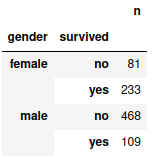

2. supervivents/no-supervivents per ranks d'edat (10 punts)
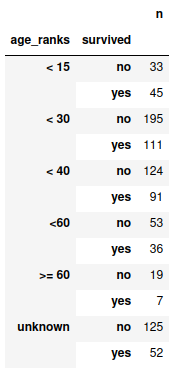

3. supervivents/no_supervivents segons el port d'embarcament (5 punts)
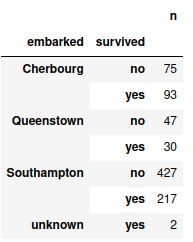

#### Passos a seguir i recomenacions a tenir en compte

- combina (*concat*, *merge*, ...) les diferents taules per tenir la informació que necessites en cada cas
- control·la possibles valors perduts o duplicats (*isna*, *fillna*, *duplicated*, ...)
- fes les transformacions (*map*, *apply*, ...) que calgui
- fes les agrupacions (*groupby*, *size*, *value_counts*, ...) per obtenir el resultats que es demanen

In [1]:
# Import pandas library as 'pd' alias
import pandas as pd

In [2]:
# Import all csv data as dataframe object
survivors = pd.read_csv('../../Notebooks/Examens/survivors.csv')
southampton = pd.read_csv('../../Notebooks/Examens/Southampton.csv')
queenstown = pd.read_csv('../../Notebooks/Examens/Queenstown.csv')
passengers = pd.read_csv('../../Notebooks/Examens/passengers.csv')
cherbourg = pd.read_csv('../../Notebooks/Examens/Cherbourg.csv')

### 1.supervivents/no-supervivents per gènere (15 punts)

- We have the ``id`` of the survivors and the deceased in the ``survivors`` table.
- We have the ``id`` of the genre in the table ``passengers``.
- We have to merge those tables. 
- We have to do it with ``how = left`` in order to count the decased ones, becouse in the survivors table we only have survivors. 

In [3]:
passengers_survival = pd.merge(passengers, survivors, how = 'left', on = 'id')

In [4]:
# Change NaN for 'no' label:
passengers_survival['survived'].fillna('no', inplace=True)

# Group passengers by gender and survival:
survival_counts = passengers_survival.groupby(['gender', 'survived']).size().unstack()

survival_counts

survived,no,yes
gender,,
female,81,233
male,468,109


### 2. supervivents/no-supervivents per ranks d'edat (10 punts)

In [5]:
# Create the ranges of ages:
age_bins = pd.IntervalIndex.from_tuples([(0, 15), (15, 30), (30, 40), (40, 60), (60, 130)])

# Add label: 
age_labels = ['<15', '<30', '<40', '<60', '>=60']

# Create new column and asign it to the range of ages:
passengers_survival['Age Range'] = pd.cut(passengers_survival['age'], bins=age_bins)

# Group passengers by this new column (Age Range) and survival:
survival_counts = passengers_survival.groupby(['Age Range', 'survived']).size().unstack(fill_value=0)

survival_counts

survived,no,yes
Age Range,,
"(0, 15]",34,49
"(15, 30]",209,117
"(30, 40]",86,69
"(40, 60]",78,50
"(60, 130]",17,5


### 3. supervivents/no_supervivents segons el port d'embarcament (5 punts) 

- Before merging the data, we have to add the camp departure to show the name in the table. This is becouse we don't have this information on the table.
- Concat all the departures tables.
- We assume that the value ``pssg_id`` of the departures, corresponds on the ``id`` of passatgers table 

In [6]:
# Add the new camp:
southampton['departure'] = 'Southampton'
queenstown['departure'] = 'Queenstown'
cherbourg['departure'] = 'Cherbourg'

In [7]:
# First, concat all the departures tables:
departures = pd.concat((southampton, queenstown, cherbourg), axis = 0)

# Rename the pass_id to id name
departures.rename(columns = {'pssg_id':'id'}, inplace = True)

# Merge the table passangers to this new departures table
port_passengers = pd.merge(passengers, departures, on = 'id')

# Add to this table if the passengers has survived or not
passengers_survival_with_port = pd.merge(port_passengers, survivors, how = 'left', on = 'id')

# Change the NaN for no label
passengers_survival_with_port['survived'].fillna('no', inplace=True)

# Keep only the interesting columns:
passengers_survival = passengers_survival_with_port[["id", "departure", "survived"]]

In [8]:
# Group by departure and survived:
departure_counts = passengers_survival.groupby(['departure', 'survived']).size().unstack()
departure_counts

survived,no,yes
departure,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217
